#**Google Play Store Apps Data Analysis**

**Loading Libraries and Dataset loarding**


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/googleplaystore.csv')

**Display the First 5 rows of dataset**

In [4]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


**Click last 3 rows of Dataset**

In [5]:
df.tail(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


**Find shape of the Dataset**

In [6]:
df.shape

(10841, 13)

####**Get Dataset Information**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


###**Get Overall Statistics of the Data**

In [8]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


####**Total Number of App Titles Containing "Astrology"**

In [9]:
astro_app = df[df['App'].str.contains('Astrology', case = False, na = False)]
astro_app_count = len(astro_app)

####**Find Average App Rating**

In [10]:
avg_rating = df['Rating'].mean()
print(avg_rating)

4.193338315362443


####**Find Total Number of Unique Categories**

In [11]:
unique_categories = df['Category'].nunique()
print(unique_categories)

34


####**Which category has highest number of rating?**

In [12]:
highest_rating_category = df.groupby('Category')['Rating'].mean().idxmax()
print(highest_rating_category)
highest_avg_rating = df.groupby('Category')['Rating'].mean().max()
print(highest_avg_rating)

1.9
19.0


####**Total Number of Apps Having 5-Star Rating**

In [13]:
five_star_apps = df[df['Rating'] == 5.0]
five_star_count = len(five_star_apps)
print(five_star_count)
print(list(five_star_apps))

274
['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


####**Find the Average Value of Reviews**

**Import LabelEncoder**

In [14]:
df['Reviews'].dtype

dtype('O')

In [25]:
avg_reviews = pd.to_numeric(df['Reviews'], errors = 'coerce')
print(avg_reviews.mean())

444152.89603321033


####**Find Total Number of Free and Paid Apps**

In [16]:
free_paid_apps = df.groupby('Type')['App'].count()
print(free_paid_apps)

Type
0           1
Free    10039
Paid      800
Name: App, dtype: int64


####**Which App has Maximum Reviews**

In [23]:
max_reviews_app = df.loc[df['Reviews'].idxmax()]['App']
print(max_reviews_app)
max_review_count = df['Reviews'].max()
print(max_review_count)

GollerCepte Live Score
9992


####**Display the Top 5 Apps with Highest Reviews**

In [27]:
#Convert datatype of Review column.
df['Reviews'] = pd.to_numeric(df['Reviews'], errors = 'coerce')

top_5_apps = df.nlargest(5, 'Reviews')[['App', 'Reviews']]
print(top_5_apps)


                     App     Reviews
2544            Facebook  78158306.0
3943            Facebook  78128208.0
336   WhatsApp Messenger  69119316.0
381   WhatsApp Messenger  69119316.0
3904  WhatsApp Messenger  69109672.0


####**Finds Average Ratings of Free and Paid Apps**

In [32]:
avg_rating = pd.DataFrame(df.groupby('Type')['Rating'].mean())
print(avg_rating)

         Rating
Type           
0     19.000000
Free   4.186203
Paid   4.266615


####**Display Top 5 Apps with Maximum Installed**

In [37]:
#Remove the non-numeric values in "Installs" column (e.g., "Free")
df = df[df['Installs'] != 'Free']

#Convert "Install" to numeric by removing comma and '+' signs
df['Installs'] = pd.to_numeric(df['Installs'], errors = 'coerce')
df['Installs'] = df['Installs'].replace(',', '')
df['Installs'] = df['Installs'].replace('+', '')

#Now, get the top 5 apps with maximum installs
top_5app = df.nlargest(5,'Installs')[['App', 'Installs']]
top_5app

,App,Installs
9148,Command & Conquer: Rivals,0.0
0,Photo Editor & Candy Camera & Grid & ScrapBook,NaN
1,Coloring book moana,NaN
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",NaN
3,Sketch - Draw & Paint,NaN


####**Distribution of App Ratings**

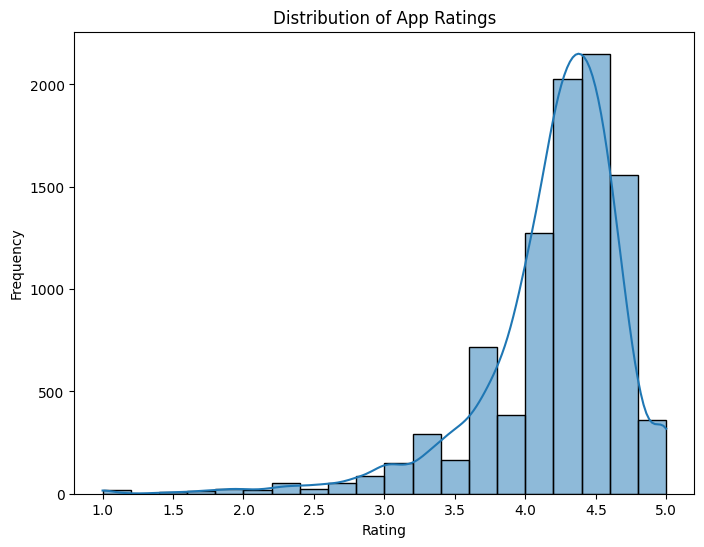

In [41]:
plt.figure(figsize = (8,6))
sns.histplot(df['Rating'].dropna(), kde = True, bins = 20)
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

####**Average Rating by Category (Bar Plot)**

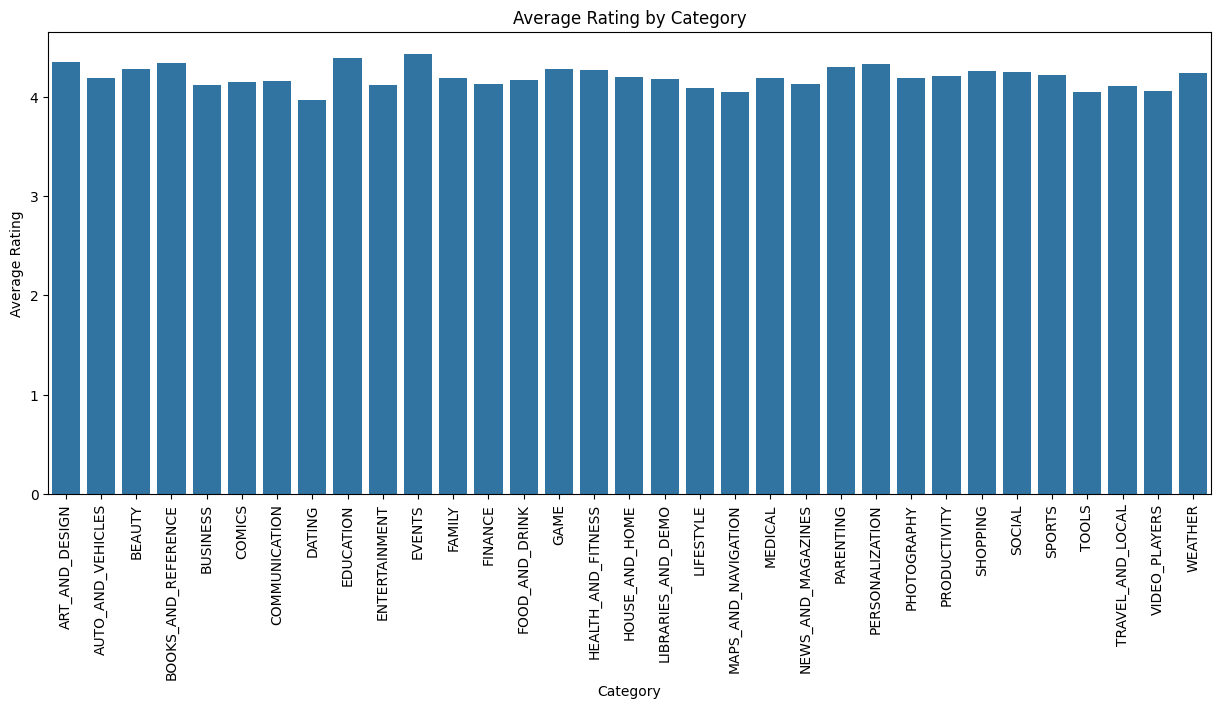

In [48]:
category_rating = df.groupby('Category')['Rating'].mean()
plt.figure(figsize = (15,6))
sns.barplot( x = category_rating.index, y = category_rating.values)
plt.title('Average Rating by Category')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.xticks(rotation = 90)
plt.show()

####**Total Number of Apps by Content Rating**

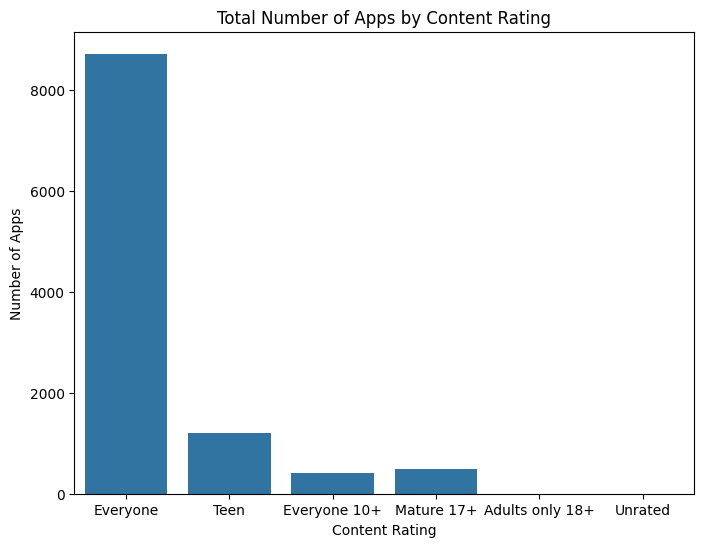

In [50]:
plt.figure(figsize = (8,6))
sns.countplot(data = df, x = 'Content Rating')
plt.title('Total Number of Apps by Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Number of Apps')
plt.show()

##**Conclusion:**

This analysis will clarify the very important aspects of the Google Play Store application ecosystem: free applications, user preferences across different categories, and highly-rated applications. Such an understanding achieved within the project will give app developers and marketers precious insights into what is being correlated with higher ratings and install counts. Such information obtained would bring immense value to making the right decisions regarding app design, category choice, and marketing efforts to further engage more users and increase platform-wide success.
